## Read Data from CSV and Calculate DQI

**Description**: Read data from a CSV file, identify errors as missing values, and calculate the DQI.

In [4]:
import os
import pandas as pd

def calculate_dqi(total, valid, errors):
    if total < 0 or valid < 0 or errors < 0:
        raise ValueError("Parameters must be >= 0")
    if valid + errors > total:
        raise ValueError("Sum of valid and errors cannot exceed total")
    return valid / total if total > 0 else 0.0

def read_csv_and_calculate_dqi(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File '{file_path}' does not exist.")
    
    df = pd.read_csv(file_path)
    total_entries = len(df)
    error_entries = df.isnull().any(axis=1).sum()  # Count rows with any missing value
    valid_entries = total_entries - error_entries
    
    dqi = calculate_dqi(total_entries, valid_entries, error_entries)
    return dqi, error_entries

# Unit test function
def test_calculate_dqi():
    assert abs(calculate_dqi(10, 8, 2) - 0.8) < 1e-6
    assert abs(calculate_dqi(0, 0, 0) - 0.0) < 1e-6
    assert abs(calculate_dqi(5, 3, 2) - 0.6) < 1e-6
    try:
        calculate_dqi(5, 4, 2)  # invalid input, should raise error
    except ValueError:
        pass
    else:
        raise AssertionError("Expected ValueError not raised")
    print("All tests passed!")

# Run unit tests
test_calculate_dqi()

# Example usage
file_path = 'data.csv'  # Make sure your CSV file is here
try:
    dqi_score, errors = read_csv_and_calculate_dqi(file_path)
    print(f"Data Quality Index (DQI): {dqi_score:.2f}")
    print(f"Number of error entries: {errors}")
except FileNotFoundError as e:
    print(e)


All tests passed!
Data Quality Index (DQI): 0.57
Number of error entries: 3


### Visualize Basic DQI with Bar Plot

**Description**: Create a bar plot for DQI and errors in a dataset.

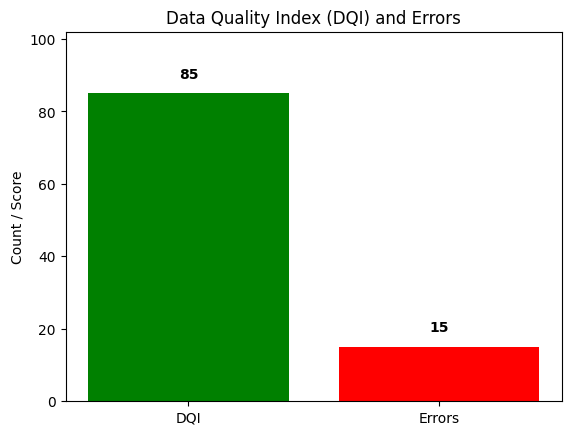

In [5]:
import matplotlib.pyplot as plt

def plot_dqi_and_errors(dqi, errors):
    labels = ['DQI', 'Errors']
    values = [dqi, errors]
    
    plt.bar(labels, values, color=['green', 'red'])
    plt.title('Data Quality Index (DQI) and Errors')
    plt.ylabel('Count / Score')
    plt.ylim(0, max(values) * 1.2)  # Add some space above bars
    
    # Annotate bars with values
    for i, v in enumerate(values):
        plt.text(i, v + max(values)*0.05, f"{v}", ha='center', fontweight='bold')
    
    plt.show()

# Example usage:
dqi_score = 85  # Example DQI score (could be percentage)
error_count = 15  # Example number of errors

plot_dqi_and_errors(dqi_score, error_count)